# Load Libraries and Data

In [1]:
import tensorflow_datasets as tfds

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from gensim import utils

In [5]:
from tqdm.notebook import tqdm

In [6]:
import gensim

In [7]:
# save the model so you dont have to train again
# model.save("yelp_word2vec")

## Load the Data

In [8]:
# load a new sample of data
ds_test = tfds.load(
    'yelp_polarity_reviews',
    split='test',
    shuffle_files=True,
)
ds_test = tfds.as_dataframe(ds_test)

In [9]:
ds_test.shape

(38000, 2)

In [10]:
ds_test.head()

,label,text
0,0,"b'Was not impressed, and will not return.'"
1,0,b'I went in to purchase overalls and was treat...
2,0,b'This place really is horrible... Every time ...
3,1,b'First time visit..... enjoyed their little ...
4,0,"b'I\'ll start with the good - Price, Location..."


### train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(ds_test["text"], ds_test["label"], test_size = 0.3, 
                                                     random_state=42, shuffle=True)

## load word2vec model

In [13]:
# load the model
model = gensim.models.Word2Vec.load("yelp_word2vec_updated_test")

In [14]:
vocab = model.wv.index_to_key

In [98]:
vocab

['the',
 'and',
 'to',
 'was',
 'it',
 'of',
 'for',
 'in',
 'is',
 'that',
 'my',
 'we',
 'you',
 'this',
 'they',
 'but',
 'with',
 'on',
 'not',
 'have',
 'had',
 'were',
 'at',
 'so',
 'are',
 'there',
 'food',
 'place',
 'be',
 'good',
 'as',
 'me',
 'all',
 'if',
 'just',
 'out',
 'like',
 'our',
 'here',
 'very',
 'one',
 'get',
 'when',
 'time',
 'or',
 'would',
 'great',
 'from',
 'their',
 'go',
 'back',
 'can',
 'about',
 'service',
 'he',
 'what',
 'she',
 'really',
 'no',
 'which',
 'up',
 'will',
 'us',
 'some',
 'because',
 'only',
 'an',
 'your',
 'them',
 'got',
 'ni',
 'don',
 'do',
 'even',
 'other',
 'nthe',
 'more',
 'after',
 'been',
 'also',
 'by',
 'too',
 'didn',
 'ordered',
 'never',
 'did',
 'order',
 'nice',
 'has',
 'well',
 'went',
 'people',
 'came',
 'then',
 'could',
 'restaurant',
 'over',
 'much',
 'said',
 'first',
 'again',
 'her',
 'know',
 'going',
 'little',
 'best',
 'how',
 'way',
 'try',
 'off',
 'am',
 'love',
 'come',
 'two',
 'always',
 'wh

## LSTM Model Creation

### Train Embeddings from scratch

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [17]:
vectorize_layer = TextVectorization(
  max_tokens=len(vocab) + 2,
  output_mode='int',
  output_sequence_length=100, 
 vocabulary=vocab)

In [99]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'and',
 'to',
 'was',
 'it',
 'of',
 'for',
 'in',
 'is',
 'that',
 'my',
 'we',
 'you',
 'this',
 'they',
 'but',
 'with',
 'on',
 'not',
 'have',
 'had',
 'were',
 'at',
 'so',
 'are',
 'there',
 'food',
 'place',
 'be',
 'good',
 'as',
 'me',
 'all',
 'if',
 'just',
 'out',
 'like',
 'our',
 'here',
 'very',
 'one',
 'get',
 'when',
 'time',
 'or',
 'would',
 'great',
 'from',
 'their',
 'go',
 'back',
 'can',
 'about',
 'service',
 'he',
 'what',
 'she',
 'really',
 'no',
 'which',
 'up',
 'will',
 'us',
 'some',
 'because',
 'only',
 'an',
 'your',
 'them',
 'got',
 'ni',
 'don',
 'do',
 'even',
 'other',
 'nthe',
 'more',
 'after',
 'been',
 'also',
 'by',
 'too',
 'didn',
 'ordered',
 'never',
 'did',
 'order',
 'nice',
 'has',
 'well',
 'went',
 'people',
 'came',
 'then',
 'could',
 'restaurant',
 'over',
 'much',
 'said',
 'first',
 'again',
 'her',
 'know',
 'going',
 'little',
 'best',
 'how',
 'way',
 'try',
 'off',
 'am',
 'love',
 'come',
 'two',


In [18]:
# vectorize_layer.adapt(X_train.values)

In [101]:
ds_test["text"][:2].values

array([b'Was not impressed, and will not return.',
       b'I went in to purchase overalls and was treated so rudely I had to walk out even though he had the item I wanted.  I will never step foot in this placec of business again.'],
      dtype=object)

In [19]:
vectorize_layer(ds_test["text"][:2])

<tf.Tensor: shape=(2, 100), dtype=int64, numpy=
array([[    5,    20,   511,     3,    63,    20,   405,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    1,    92,     9,     4,   971, 84434,     3,     5,   916,
           25,  3164,     1,    22,     4,   356,    37,    75,   243,
           56

In [20]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'and',
 'to',
 'was',
 'it',
 'of',
 'for',
 'in',
 'is',
 'that',
 'my',
 'we',
 'you',
 'this',
 'they',
 'but',
 'with',
 'on',
 'not',
 'have',
 'had',
 'were',
 'at',
 'so',
 'are',
 'there',
 'food',
 'place',
 'be',
 'good',
 'as',
 'me',
 'all',
 'if',
 'just',
 'out',
 'like',
 'our',
 'here',
 'very',
 'one',
 'get',
 'when',
 'time',
 'or',
 'would',
 'great',
 'from',
 'their',
 'go',
 'back',
 'can',
 'about',
 'service',
 'he',
 'what',
 'she',
 'really',
 'no',
 'which',
 'up',
 'will',
 'us',
 'some',
 'because',
 'only',
 'an',
 'your',
 'them',
 'got',
 'ni',
 'don',
 'do',
 'even',
 'other',
 'nthe',
 'more',
 'after',
 'been',
 'also',
 'by',
 'too',
 'didn',
 'ordered',
 'never',
 'did',
 'order',
 'nice',
 'has',
 'well',
 'went',
 'people',
 'came',
 'then',
 'could',
 'restaurant',
 'over',
 'much',
 'said',
 'first',
 'again',
 'her',
 'know',
 'going',
 'little',
 'best',
 'how',
 'way',
 'try',
 'off',
 'am',
 'love',
 'come',
 'two',


In [21]:
len(vectorize_layer.get_vocabulary())

89172

In [22]:
input_layer = tf.keras.layers.Input(shape = (1), dtype = tf.dtypes.string)

In [23]:
input_layer

<KerasTensor: shape=(None, 1) dtype=string (created by layer 'input_1')>

In [24]:
text_vec_layer = vectorize_layer

In [25]:
text_vec_layer_output = text_vec_layer(input_layer)

In [26]:
text_vec_layer_output

<KerasTensor: shape=(None, 100) dtype=int64 (created by layer 'text_vectorization')>

In [102]:
emb_layer = tf.keras.layers.Embedding(len(vocab), 100)

In [103]:
emb_output = emb_layer(text_vec_layer_output)

In [104]:
emb_output

<KerasTensor: shape=(None, 100, 100) dtype=float32 (created by layer 'embedding_3')>

In [29]:
emb_layer.get_weights()[0].shape

(89170, 100)

In [30]:
# Other RNN layers - SimpleRNN, GRU
lstm_layer = tf.keras.layers.LSTM(16)

In [31]:
lstm_output = lstm_layer(emb_output)

In [32]:
lstm_output

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'lstm')>

In [33]:
pred_head = tf.keras.layers.Dense(1)

In [34]:
pred_head_output = pred_head(lstm_output)

In [35]:
lstm_model = tf.keras.models.Model(input_layer, pred_head_output)

In [36]:
lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 100, 100)          8917000   
                                                                 
 lstm (LSTM)                 (None, 16)                7488      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 8,924,505
Trainable params: 8,924,505
Non-trainable params: 0
___________________________________________________

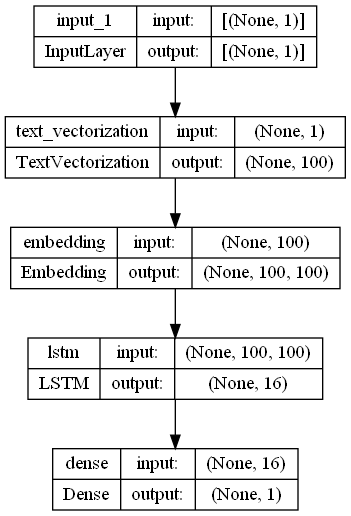

In [37]:
tf.keras.utils.plot_model(lstm_model, show_shapes = True)

In [38]:
lstm_model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
                  optimizer = "Adam", 
                  metrics = "accuracy")

In [39]:
history = lstm_model.fit(X_train, y_train, 
              epochs = 10000, batch_size = 512, 
              callbacks = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 5, 
                                                          restore_best_weights=True, 
                                                          mode = "max"), 
              verbose = 1, shuffle = True, 
              validation_data = (X_valid, y_valid), 
              validation_batch_size = 1024)

Epoch 1/10000
52/52 [==============================] - 11s 149ms/step - loss: 0.6781 - accuracy: 0.4995 - val_loss: 0.6489 - val_accuracy: 0.5011
Epoch 2/10000
52/52 [==============================] - 6s 125ms/step - loss: 0.4823 - accuracy: 0.7294 - val_loss: 0.3970 - val_accuracy: 0.8418
Epoch 3/10000
52/52 [==============================] - 6s 125ms/step - loss: 0.3225 - accuracy: 0.8836 - val_loss: 0.3498 - val_accuracy: 0.8674
Epoch 4/10000
52/52 [==============================] - 6s 122ms/step - loss: 0.2642 - accuracy: 0.9073 - val_loss: 0.3505 - val_accuracy: 0.8575
Epoch 5/10000
52/52 [==============================] - 6s 120ms/step - loss: 0.2300 - accuracy: 0.9235 - val_loss: 0.3627 - val_accuracy: 0.8648
Epoch 6/10000
52/52 [==============================] - 6s 118ms/step - loss: 0.2231 - accuracy: 0.9258 - val_loss: 0.3951 - val_accuracy: 0.8499
Epoch 7/10000
52/52 [==============================] - 6s 119ms/step - loss: 0.2231 - accuracy: 0.9270 - val_loss: 0.3950 - val_a

In [40]:
import matplotlib.pyplot as plt

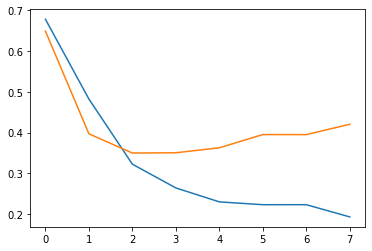

In [41]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

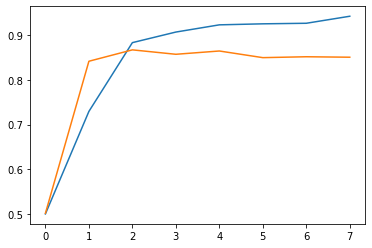

In [42]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [43]:
lstm_model.evaluate(X_valid, y_valid, batch_size = 1024)

12/12 [==============================] - 2s 120ms/step - loss: 0.3498 - accuracy: 0.8674


[0.34979185461997986, 0.8673684000968933]

### Train Embeddings not from scratch
### Use Transfer learning

In [44]:
vocab

['the',
 'and',
 'to',
 'was',
 'it',
 'of',
 'for',
 'in',
 'is',
 'that',
 'my',
 'we',
 'you',
 'this',
 'they',
 'but',
 'with',
 'on',
 'not',
 'have',
 'had',
 'were',
 'at',
 'so',
 'are',
 'there',
 'food',
 'place',
 'be',
 'good',
 'as',
 'me',
 'all',
 'if',
 'just',
 'out',
 'like',
 'our',
 'here',
 'very',
 'one',
 'get',
 'when',
 'time',
 'or',
 'would',
 'great',
 'from',
 'their',
 'go',
 'back',
 'can',
 'about',
 'service',
 'he',
 'what',
 'she',
 'really',
 'no',
 'which',
 'up',
 'will',
 'us',
 'some',
 'because',
 'only',
 'an',
 'your',
 'them',
 'got',
 'ni',
 'don',
 'do',
 'even',
 'other',
 'nthe',
 'more',
 'after',
 'been',
 'also',
 'by',
 'too',
 'didn',
 'ordered',
 'never',
 'did',
 'order',
 'nice',
 'has',
 'well',
 'went',
 'people',
 'came',
 'then',
 'could',
 'restaurant',
 'over',
 'much',
 'said',
 'first',
 'again',
 'her',
 'know',
 'going',
 'little',
 'best',
 'how',
 'way',
 'try',
 'off',
 'am',
 'love',
 'come',
 'two',
 'always',
 'wh

In [45]:
model.wv.get_vector("the")

array([-1.1574947 , -0.452551  , -1.5335685 , -0.03271338,  0.3197497 ,
       -2.3528738 ,  0.43736866,  0.05513816, -0.59228134, -1.8694669 ,
       -0.526755  ,  1.8256084 ,  0.09319733,  0.3246989 ,  1.3131623 ,
        0.35492527,  0.7232448 ,  0.80615455, -0.8139993 ,  1.7066592 ,
        0.39427716,  0.8197632 , -0.39644253,  0.38130632, -0.7165441 ,
        0.08910789, -0.7406138 , -0.00811723,  0.11232901, -1.0138094 ,
        0.93588954, -0.10616904, -0.29438257, -0.1180708 ,  0.19028632,
        0.6306228 ,  0.01677293,  0.864823  , -1.5031995 ,  1.4081087 ,
       -0.6075313 , -0.3863363 ,  0.9791384 ,  0.16055577, -1.2889662 ,
        0.9951726 , -1.150347  , -0.35964212, -1.9179587 , -0.44979647,
       -0.67100275,  1.1714387 ,  0.09217948,  1.0939456 ,  0.09705472,
        0.08282842, -0.86842537, -0.08450148, -2.3771186 ,  0.1926908 ,
        0.9044539 ,  0.53739285, -1.6240276 ,  0.9174075 , -0.0086706 ,
        0.97550255, -0.74785995, -0.70277315,  1.1262612 , -0.88

In [46]:
model.wv.vectors[0,:]

array([-1.1574947 , -0.452551  , -1.5335685 , -0.03271338,  0.3197497 ,
       -2.3528738 ,  0.43736866,  0.05513816, -0.59228134, -1.8694669 ,
       -0.526755  ,  1.8256084 ,  0.09319733,  0.3246989 ,  1.3131623 ,
        0.35492527,  0.7232448 ,  0.80615455, -0.8139993 ,  1.7066592 ,
        0.39427716,  0.8197632 , -0.39644253,  0.38130632, -0.7165441 ,
        0.08910789, -0.7406138 , -0.00811723,  0.11232901, -1.0138094 ,
        0.93588954, -0.10616904, -0.29438257, -0.1180708 ,  0.19028632,
        0.6306228 ,  0.01677293,  0.864823  , -1.5031995 ,  1.4081087 ,
       -0.6075313 , -0.3863363 ,  0.9791384 ,  0.16055577, -1.2889662 ,
        0.9951726 , -1.150347  , -0.35964212, -1.9179587 , -0.44979647,
       -0.67100275,  1.1714387 ,  0.09217948,  1.0939456 ,  0.09705472,
        0.08282842, -0.86842537, -0.08450148, -2.3771186 ,  0.1926908 ,
        0.9044539 ,  0.53739285, -1.6240276 ,  0.9174075 , -0.0086706 ,
        0.97550255, -0.74785995, -0.70277315,  1.1262612 , -0.88

In [47]:
np.mean(model.wv.get_vector("the") == model.wv.vectors[0,:])

1.0

In [48]:
word_vecs = model.wv.vectors

In [49]:
to_add = np.zeros((2, model.wv.vectors.shape[1]))

In [50]:
word_vecs = np.vstack((to_add, word_vecs))

In [51]:
word_vecs.shape

(89172, 100)

In [52]:
input_layer = tf.keras.layers.Input(shape = (1), dtype = tf.dtypes.string)

In [53]:
input_layer

<KerasTensor: shape=(None, 1) dtype=string (created by layer 'input_2')>

In [54]:
vectorize_layer = TextVectorization(
  max_tokens=None,
  output_mode='int',
  output_sequence_length=100, 
vocabulary=vocab)

In [55]:
text_vec_layer = vectorize_layer

In [56]:
text_vec_layer_output = text_vec_layer(input_layer)

In [57]:
text_vec_layer_output

<KerasTensor: shape=(None, 100) dtype=int64 (created by layer 'text_vectorization_1')>

In [58]:
emb_layer = tf.keras.layers.Embedding(len(vocab) + 2, 100, 
                                     trainable = False, 
                                     weights = [word_vecs])

In [59]:
emb_output = emb_layer(text_vec_layer_output)

In [60]:
emb_layer.get_weights()[0].shape

(89172, 100)

In [61]:
lstm_layer = tf.keras.layers.LSTM(16)

In [62]:
lstm_output = lstm_layer(emb_output)

In [63]:
lstm_output

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'lstm_1')>

In [64]:
pred_head = tf.keras.layers.Dense(1)

In [65]:
pred_head_output = pred_head(lstm_output)

In [66]:
lstm_model = tf.keras.models.Model(input_layer, pred_head_output)

In [67]:
lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 100, 100)          8917200   
                                                                 
 lstm_1 (LSTM)               (None, 16)                7488      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,924,705
Trainable params: 7,505
Non-trainable params: 8,917,200
_____________________________________________

In [68]:
lstm_model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
                  optimizer = tf.keras.optimizers.Adam(1e-3), 
                  metrics = "accuracy")

In [69]:
history = lstm_model.fit(X_train, y_train, 
              epochs = 10000, batch_size = 512, 
              callbacks = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 5, 
                                                          restore_best_weights=True, 
                                                          mode = "max"), 
              verbose = 1, shuffle = True, 
              validation_data = (X_valid, y_valid), 
              validation_batch_size = 1024)

Epoch 1/10000
52/52 [==============================] - 9s 140ms/step - loss: 0.6747 - accuracy: 0.5071 - val_loss: 0.6546 - val_accuracy: 0.5246
Epoch 2/10000
52/52 [==============================] - 7s 127ms/step - loss: 0.6097 - accuracy: 0.5917 - val_loss: 0.5345 - val_accuracy: 0.7401
Epoch 3/10000
52/52 [==============================] - 8s 155ms/step - loss: 0.4826 - accuracy: 0.7815 - val_loss: 0.4600 - val_accuracy: 0.8088
Epoch 4/10000
52/52 [==============================] - 7s 141ms/step - loss: 0.4483 - accuracy: 0.8122 - val_loss: 0.4310 - val_accuracy: 0.8189
Epoch 5/10000
52/52 [==============================] - 7s 137ms/step - loss: 0.4352 - accuracy: 0.8221 - val_loss: 0.6036 - val_accuracy: 0.7409
Epoch 6/10000
52/52 [==============================] - 7s 138ms/step - loss: 0.5176 - accuracy: 0.7667 - val_loss: 0.4488 - val_accuracy: 0.8098
Epoch 7/10000
52/52 [==============================] - 7s 142ms/step - loss: 0.4362 - accuracy: 0.8227 - val_loss: 0.4338 - val_ac

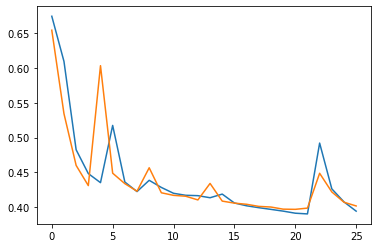

In [70]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

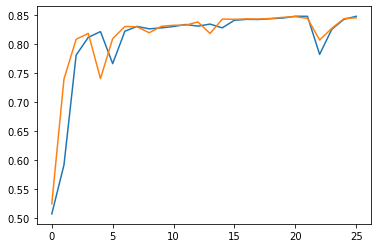

In [71]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [72]:
lstm_model.evaluate(X_valid, y_valid, batch_size = 1024)

12/12 [==============================] - 2s 141ms/step - loss: 0.3968 - accuracy: 0.8479


[0.39683863520622253, 0.8478947281837463]

### Fine Tune for Domain Adaptation

In [73]:
input_layer = tf.keras.layers.Input(shape = (1), dtype = tf.dtypes.string)

In [74]:
input_layer

<KerasTensor: shape=(None, 1) dtype=string (created by layer 'input_3')>

In [75]:
vectorize_layer = TextVectorization(
  max_tokens=None,
  output_mode='int',
  output_sequence_length=100, 
vocabulary=vocab)

In [76]:
text_vec_layer = vectorize_layer

In [77]:
text_vec_layer_output = text_vec_layer(input_layer)

In [78]:
text_vec_layer_output

<KerasTensor: shape=(None, 100) dtype=int64 (created by layer 'text_vectorization_2')>

In [79]:
emb_layer = tf.keras.layers.Embedding(len(vocab) + 2, 100, 
                                     trainable = True, 
                                     weights = [word_vecs])

In [80]:
emb_output = emb_layer(text_vec_layer_output)

In [81]:
emb_layer.get_weights()[0].shape

(89172, 100)

In [82]:
lstm_layer = tf.keras.layers.LSTM(16)

In [83]:
lstm_output = lstm_layer(emb_output)

In [84]:
lstm_output

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'lstm_2')>

In [85]:
pred_head = tf.keras.layers.Dense(1)

In [86]:
pred_head_output = pred_head(lstm_output)

In [87]:
lstm_model = tf.keras.models.Model(input_layer, pred_head_output)

In [88]:
lstm_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 100, 100)          8917200   
                                                                 
 lstm_2 (LSTM)               (None, 16)                7488      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,924,705
Trainable params: 8,924,705
Non-trainable params: 0
_________________________________________________

In [89]:
# emb_layer.trainable = True

In [90]:
lstm_model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
                  optimizer = tf.keras.optimizers.Adam(1e-3), 
                  metrics = "accuracy")

In [91]:
lstm_model = tf.keras.models.Model(input_layer, pred_head_output)

In [92]:
lstm_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 100, 100)          8917200   
                                                                 
 lstm_2 (LSTM)               (None, 16)                7488      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,924,705
Trainable params: 8,924,705
Non-trainable params: 0
_________________________________________________

In [93]:
lstm_model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
                  optimizer = "Adam", 
                  metrics = "accuracy")

In [94]:
history = lstm_model.fit(X_train, y_train, 
              epochs = 10000, batch_size = 512, 
              callbacks = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 5, 
                                                          restore_best_weights=True, 
                                                          mode = "max"), 
              verbose = 1, shuffle = True, 
              validation_data = (X_valid, y_valid), 
              validation_batch_size = 1024)

Epoch 1/10000
52/52 [==============================] - 9s 143ms/step - loss: 0.6757 - accuracy: 0.5044 - val_loss: 0.6597 - val_accuracy: 0.5163
Epoch 2/10000
52/52 [==============================] - 6s 124ms/step - loss: 0.6096 - accuracy: 0.6028 - val_loss: 0.5268 - val_accuracy: 0.7446
Epoch 3/10000
52/52 [==============================] - 7s 126ms/step - loss: 0.4884 - accuracy: 0.7750 - val_loss: 0.4638 - val_accuracy: 0.8012
Epoch 4/10000
52/52 [==============================] - 6s 124ms/step - loss: 0.4481 - accuracy: 0.8190 - val_loss: 0.4458 - val_accuracy: 0.8154
Epoch 5/10000
52/52 [==============================] - 6s 125ms/step - loss: 0.4092 - accuracy: 0.8320 - val_loss: 0.4168 - val_accuracy: 0.8318
Epoch 6/10000
52/52 [==============================] - 6s 124ms/step - loss: 0.3768 - accuracy: 0.8548 - val_loss: 0.4044 - val_accuracy: 0.8439
Epoch 7/10000
52/52 [==============================] - 6s 124ms/step - loss: 0.3601 - accuracy: 0.8652 - val_loss: 0.4018 - val_ac

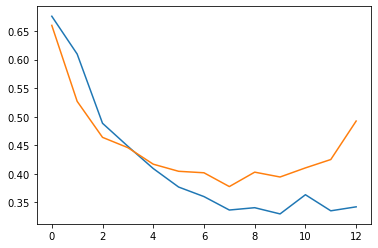

In [95]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

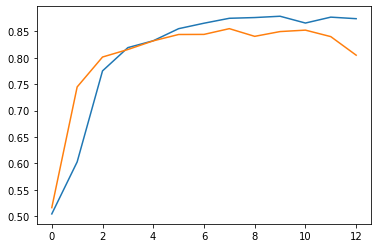

In [96]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [97]:
lstm_model.evaluate(X_valid, y_valid,batch_size = 1024)

12/12 [==============================] - 2s 120ms/step - loss: 0.3777 - accuracy: 0.8549


[0.3776639699935913, 0.854912281036377]

### References

[1] https://openclassrooms.com/en/courses/6532301-introduction-to-natural-language-processing/6980811-apply-a-simple-bag-of-words-approach

[2] https://swatimeena989.medium.com/training-word2vec-using-gensim-14433890e8e4

[3] http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

[4] https://medium.com/wisio/a-gentle-introduction-to-doc2vec-db3e8c0cce5e

[5] https://github.com/pwharrison/modern-nlp-in-python/blob/master/executable/Modern_NLP_in_Python.ipynb

[6] https://stackoverflow.com/questions/67697776/how-did-online-training-work-in-the-word2vec-model-using-genism

[7] https://stackoverflow.com/questions/53616003/doc2vec-online-training